# Машинное обучение (семинары)

## Урок 9. Ансамбли на практике

Ваша задача — реализовать алгоритм случайного леса для задачи классификации и применить его к набору данных.

Шаги выполнения задания:

1. Импортируйте необходимые библиотеки: numpy, pandas, sklearn.

2. Загрузите набор данных для задачи классификации. Вы можете использовать любой доступный набор данных или выбрать один из популярных, таких как Iris, Wine или MNIST.

3. Проведите предварительную обработку данных, включая масштабирование и разделение на обучающую и тестовую выборки.

4. Реализуйте алгоритм случайного леса. Включите в него функции для построения деревьев решений, выбора случайных признаков и голосования для принятия решений.

5. Обучите вашу модель случайного леса на обучающей выборке.

6. Оцените производительность модели на тестовой выборке, используя метрики классификации, такие как точность, полнота и F1-мера.

7. Проведите сравнение результатов вашей модели со стандартной реализацией случайного леса из библиотеки scikit-learn.

##### 1. Импортируйте необходимые библиотеки: numpy, pandas, sklearn.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

##### 2. Загрузите набор данных для задачи классификации. Вы можете использовать любой доступный набор данных или выбрать один из популярных, таких как Iris, Wine или MNIST.

In [2]:
# # Скачиваем датасет
# from pathlib import Path
# import opendatasets as od

# dataset_path = Path('uciml/iris')
# # Проверяем существование директории с датасетом
# if not dataset_path.is_file():
#     od.download('https://www.kaggle.com/datasets/uciml/iris/data')

In [3]:
# Загрузка данных из файла
iris_df = pd.read_csv('iris/Iris.csv')

In [4]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


##### 3. Проведите предварительную обработку данных, включая масштабирование и разделение на обучающую и тестовую выборки.

In [5]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Информация об атрибутах (по порядку):

Id - Порядковый номер, индивидуальный индефикатор

SepalLengthCm - Длина чашелистика (sepal length) в сантиметрах

SepalWidthCm - Ширина чашелистика (sepal width) в сантиметрах

PetalLengthCm - Длина лепестка (petal length) в сантиметрах

PetalWidthCm - Ширина лепестка (petal width) в сантиметрах

Species - Вид/тип цветка

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Из общей информации iris_df следует:
1. DataFrame содержит 150 записей (от индекса 0 до 149)
2. Всего 6 колонок
3. Нулевые значения отсуствуют
4. Нет пропущеных записей в колонках
5. Колонки SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm в формате float64
6. Колонка Species в формате object 

In [7]:
# Статистический анализ числовых переменных
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [8]:
# Статистический анализ объектных переменных
iris_df.describe(include='object').T

,count,unique,top,freq
Species,150,3,Iris-setosa,50


In [9]:
duplicate_iris_df = iris_df[iris_df.duplicated()]
print("number of duplicate rows: ", duplicate_iris_df.shape)

number of duplicate rows:  (0, 6)


Дубликатов не обнаружено.

In [10]:
# Проверка на NaN значения
iris_df.isnull().any().any()

False

In [11]:
# Проверка на нулевые значения
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Пропущеных значений и NaN не обнаружено. 

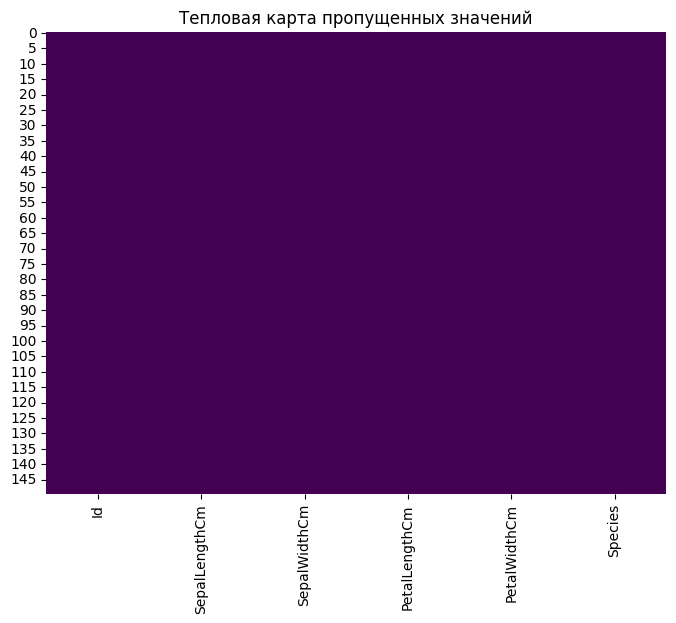

In [12]:
# Визуализация пропущенных значений (тепловая карта)
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.isnull(), cbar=False, cmap='viridis')
plt.title('Тепловая карта пропущенных значений')
plt.show()

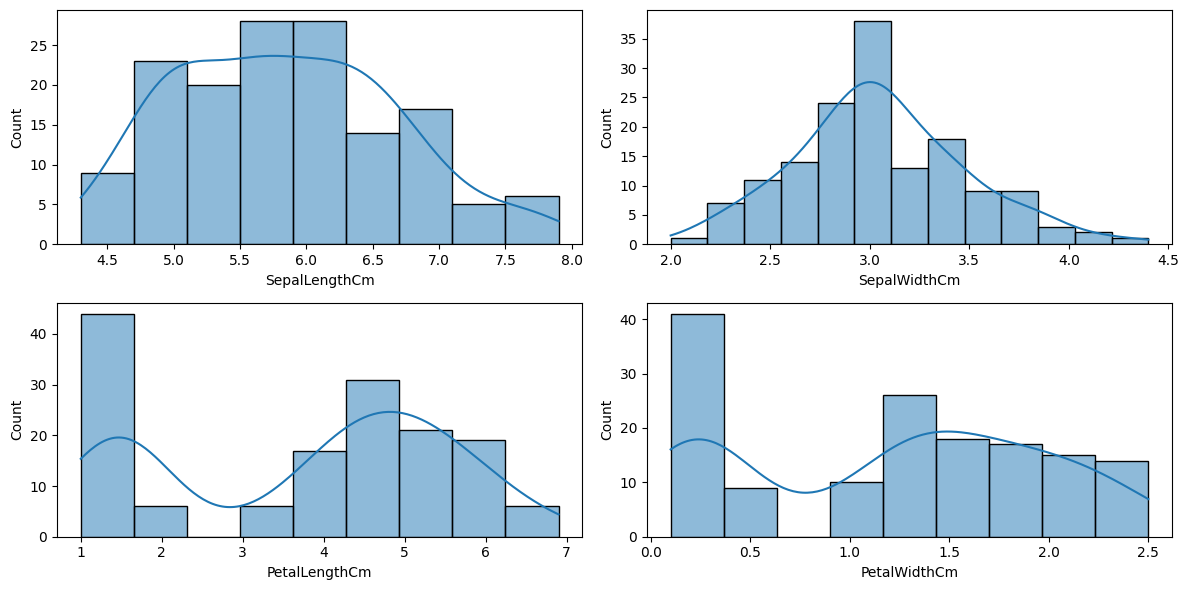

In [13]:
# Визуализация гистограмм
plt.figure(figsize=(12, 6))
for i, column in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(iris_df[column], kde=True)

plt.tight_layout()
plt.show()

C:\Users\Esdesu\AppData\Local\Temp\ipykernel_5084\1360235048.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data=iris_df, palette='Set2')


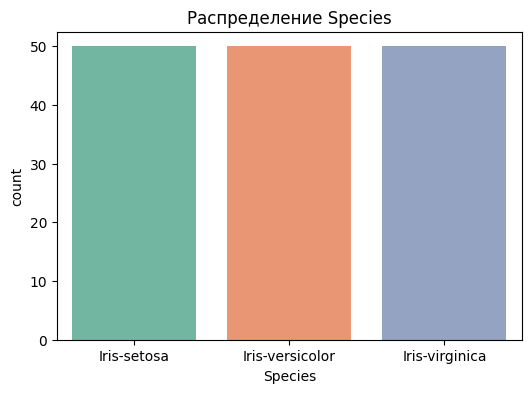

In [14]:
# Проверка баланса категириональных признаков
plt.figure(figsize=(6, 4))
sns.countplot(x='Species', data=iris_df, palette='Set2')
plt.title("Распределение Species")
plt.show()

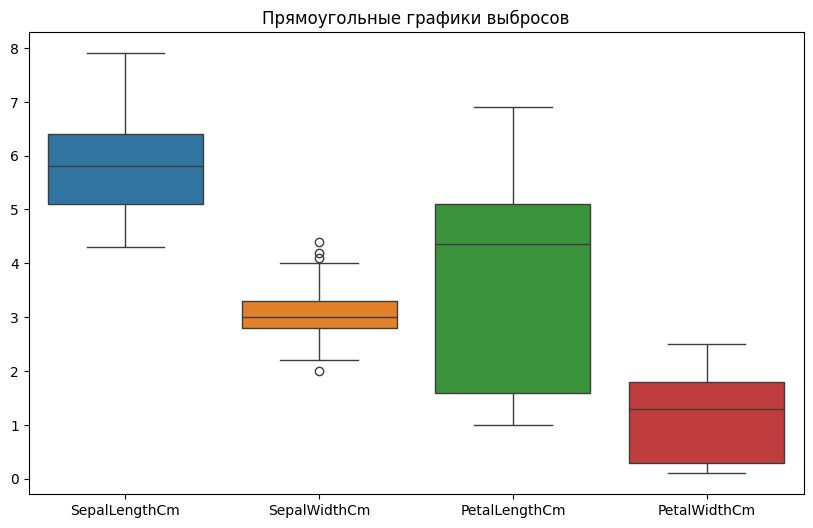

In [15]:
# Прямоугольные графики для визуализации распределений и потенциальных выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
plt.title("Прямоугольные графики выбросов")
plt.show()

В SepalWidthCm есть не большие выбросы, но мы пока мы не будем их трогать.

In [16]:
# Удаляем столбец Id поскольку он для работы нам не нужен
iris_df = iris_df.drop('Id', axis=1)

In [17]:
# Подготавливаем столбец Species перед обученим модели
# Приводим обектные значения к интовым
mapDiag = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris_df['Species'] = iris_df['Species'].map(mapDiag)

print(f"Кодировка", mapDiag)

Кодировка {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


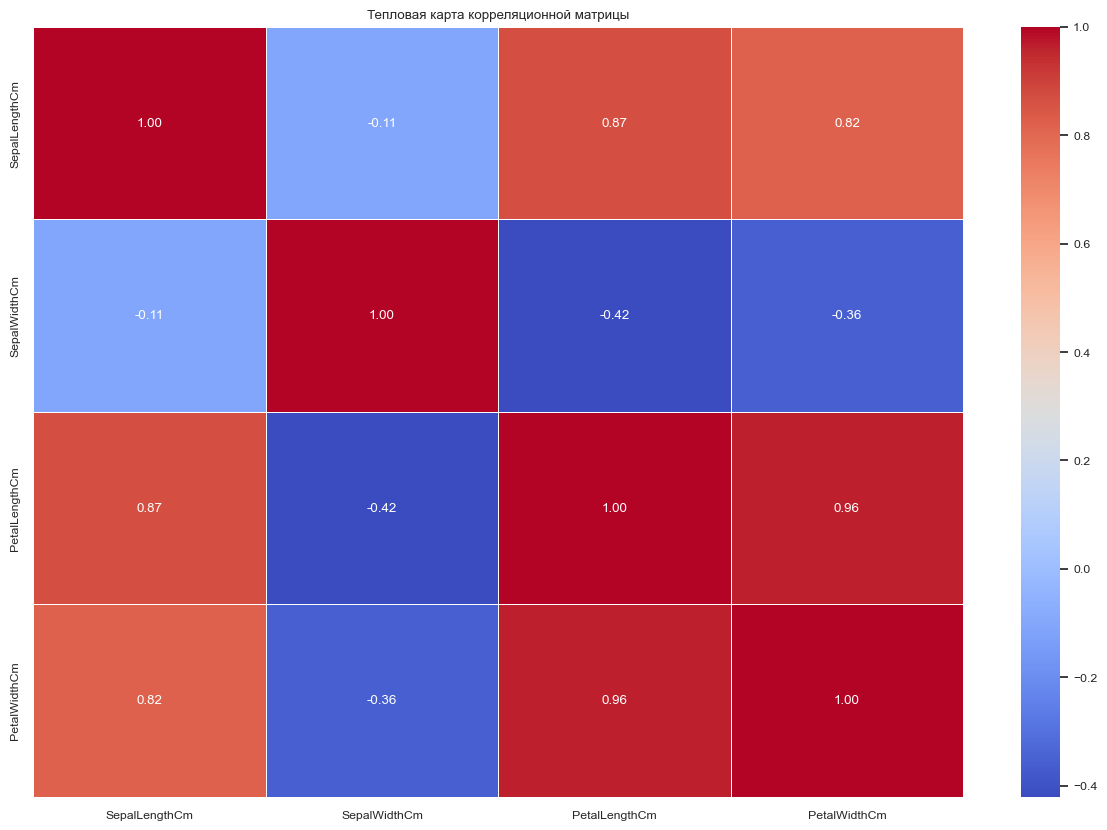

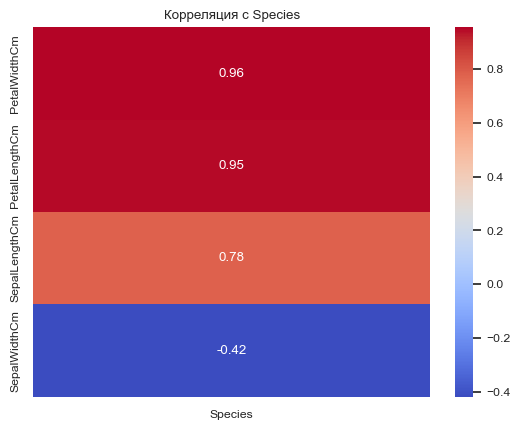

In [33]:
# Вычисляем корреляционную матрицу для обработанного DataFrame, Визуализация распределения нескольких выбранных числовых переменных
correlation_matrix_selected_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Визуализация корреляции между выбранными переменными
correlation_matrix = iris_df[correlation_matrix_selected_columns].corr()
# Настраиваем размеры тепловой карты
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Тепловая карта корреляционной матрицы")
plt.show()

# Вычисляем корреляцию между всеми переменными и сохраняем в переменной corr
corr = iris_df.corr()
target_corr = corr['Species'].drop('Species')

# Сортируем корреляции по убыванию
target_corr_sorted = target_corr.sort_values(ascending=False)

# Настраиваем параметры визуализации для тепловой карты
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Корреляция с Species')
plt.show()

In [19]:
# Проверяем столбцы в DF
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [20]:
# DataFrame iris
# Определение независимых и зависимых переменных
X_iris = iris_df.drop(["Species"], axis=1) # Независимые переменные
y_iris = iris_df['Species']  # Зависимая переменная

# Масштабирование признаков
scaler = StandardScaler()
X_scaled_iris = scaler.fit_transform(X_iris)

# Разделение данных на обучающую и тестовую выборки
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_scaled_iris, y_iris, test_size=0.2, random_state=42)

# Выводим размеры
print("Размер обучающего набора iris:", X_train_iris.shape)
print("Размер тестового набора: iris", X_test_iris.shape)

Размер обучающего набора iris: (120, 4)
Размер тестового набора: iris (30, 4)


##### 4. Реализуйте алгоритм случайного леса. Включите в него функции для построения деревьев решений, выбора случайных признаков и голосования для принятия решений.

In [21]:
class RandomForest:
    def __init__(self, n_trees=100, max_features='sqrt'):
        """
            Инициализация модели случайного леса.
            Параметры:
            n_trees (int): Количество деревьев в лесу.
            max_features (str or int): Максимальное количество признаков для выбора при обучении каждого дерева.
            'sqrt' означает, что будет выбрано корень из общего количества признаков.
        """
        self.n_trees = n_trees  # Количество деревьев
        self.max_features = max_features  # Максимальное количество признаков
        self.trees = []  # Список для хранения обученных деревьев
    
    def fit(self, X, y):
        """
            Обучение модели случайного леса.
            Параметры:
            X (numpy.ndarray): Матрица признаков (обучающие данные).
            y (numpy.ndarray): Вектор целевых переменных (метки классов).
        """
        n_samples, n_features = X.shape  # Получаем количество образцов и признаков
        for _ in range(self.n_trees):
            # Bootstrap sampling: случайный выбор с возвращением
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[indices] # Выборка признаков
            y_sample = y.iloc[indices]  # Используем iloc для доступа по позициям

            # Случайный выбор признаков для каждого дерева
            if self.max_features == 'sqrt':
                features_indices = np.random.choice(n_features, int(np.sqrt(n_features)), replace=False)
            else:
                features_indices = np.arange(n_features) # Используем все признаки

            # Обучение дерева решений на выборке
            tree = DecisionTreeClassifier()
            tree.fit(X_sample[:, features_indices], y_sample) # Обучаем дерево на выбранных признаках
            self.trees.append((tree, features_indices)) # Сохраняем дерево и индексы выбранных признаков

    def predict(self, X):
        """
            Предсказание классов для новых данных.

            Параметры:
            X (numpy.ndarray): Матрица признаков (данные для предсказания).

            Возвращает:
            numpy.ndarray: Предсказанные классы.
        """
        tree_preds = [] # Список для хранения предсказаний от каждого дерева
        for tree, features_indices in self.trees:
            preds = tree.predict(X[:, features_indices]) # Получаем предсказания от дерева
            tree_preds.append(preds) # Сохраняем предсказания
        # Выбираем класс с наибольшим количеством голосов
        return np.array([np.bincount(tree_pred).argmax() for tree_pred in zip(*tree_preds)])

##### 5. Обучите вашу модель случайного леса на обучающей выборке.

Точность модели случайного леса: 1.00
Полнота модели случайного леса: 1.00
Оценка качества классификации случайного леса: 1.00
F1-мера модели случайного леса: 1.00

Отчет о классификации:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



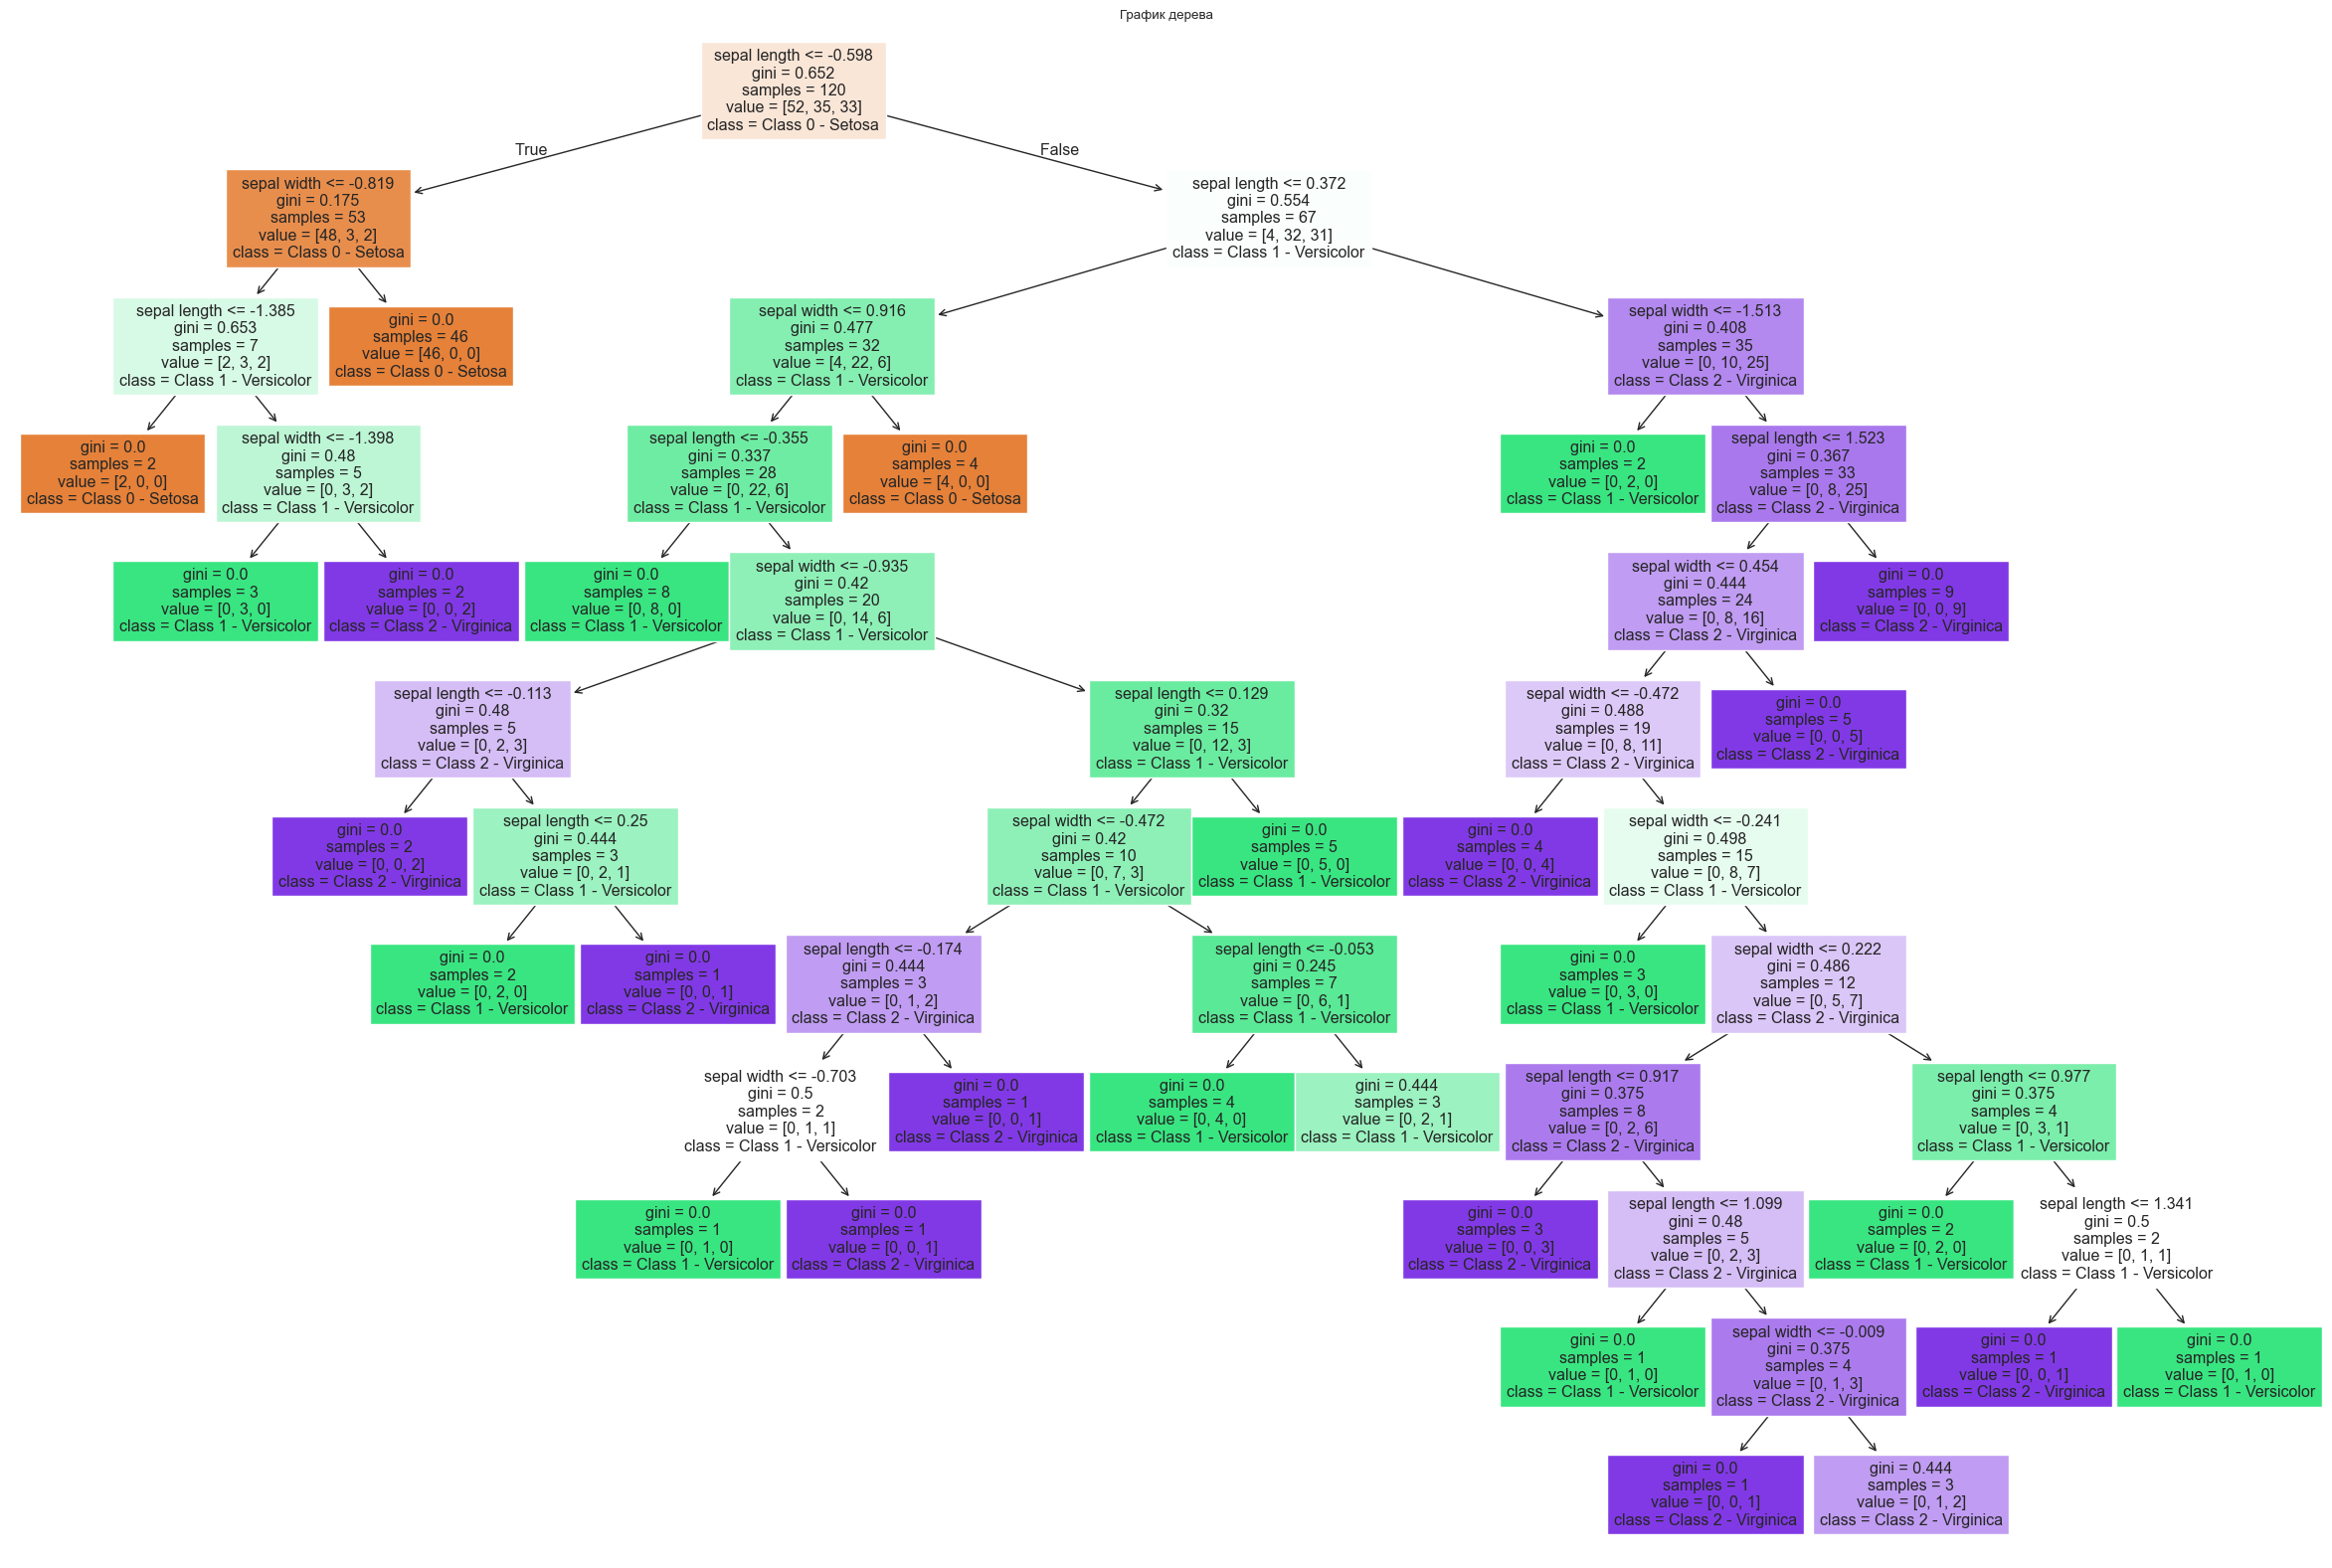

In [22]:
# Обучение модели случайного леса
rf_model_train = RandomForest(n_trees=100)  
rf_model_train.fit(X_train_iris, y_train_iris) 

# Предсказание на обучающем наборе
y_pred_iris_train = rf_model_train.predict(X_train_iris)

# Вычисление и вывод точности модели, генерация отчета о классификации, полноты и F1-меры
accuracy_train = accuracy_score(y_train_iris, y_pred_iris_train) 
precision_train = precision_score(y_train_iris, y_pred_iris_train, average='weighted')
recall_train = recall_score(y_train_iris, y_pred_iris_train, average='weighted')
f1_train = f1_score(y_train_iris, y_pred_iris_train, average='weighted')
report_train = classification_report(y_train_iris, y_pred_iris_train)

# Вывод результатов
print(f"Точность модели случайного леса: {accuracy_train:.2f}")
print(f"Полнота модели случайного леса: {recall_train:.2f}")
print(f"Оценка качества классификации случайного леса: {precision_train:.2f}")
print(f"F1-мера модели случайного леса: {f1_train:.2f}")
print("\nОтчет о классификации:\n", report_train)

# Построение графика дерева
plt.figure(figsize=(30, 20))  

plot_tree(rf_model_train.trees[0][0], filled=True, 
    feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],  # Имена признаков
    class_names=['Class 0 - Setosa', 'Class 1 - Versicolor', 'Class 2 - Virginica'])  # Имена классов для Iris
plt.title('График дерева')  
plt.show()  

##### 6. Оцените производительность модели на тестовой выборке, используя метрики классификации, такие как точность, полнота и F1-мера.

Точность модели случайного леса: 1.00
Полнота модели случайного леса: 1.00
Оценка качества классификации случайного леса: 1.00
F1-мера модели случайного леса: 1.00

Отчет о классификации:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



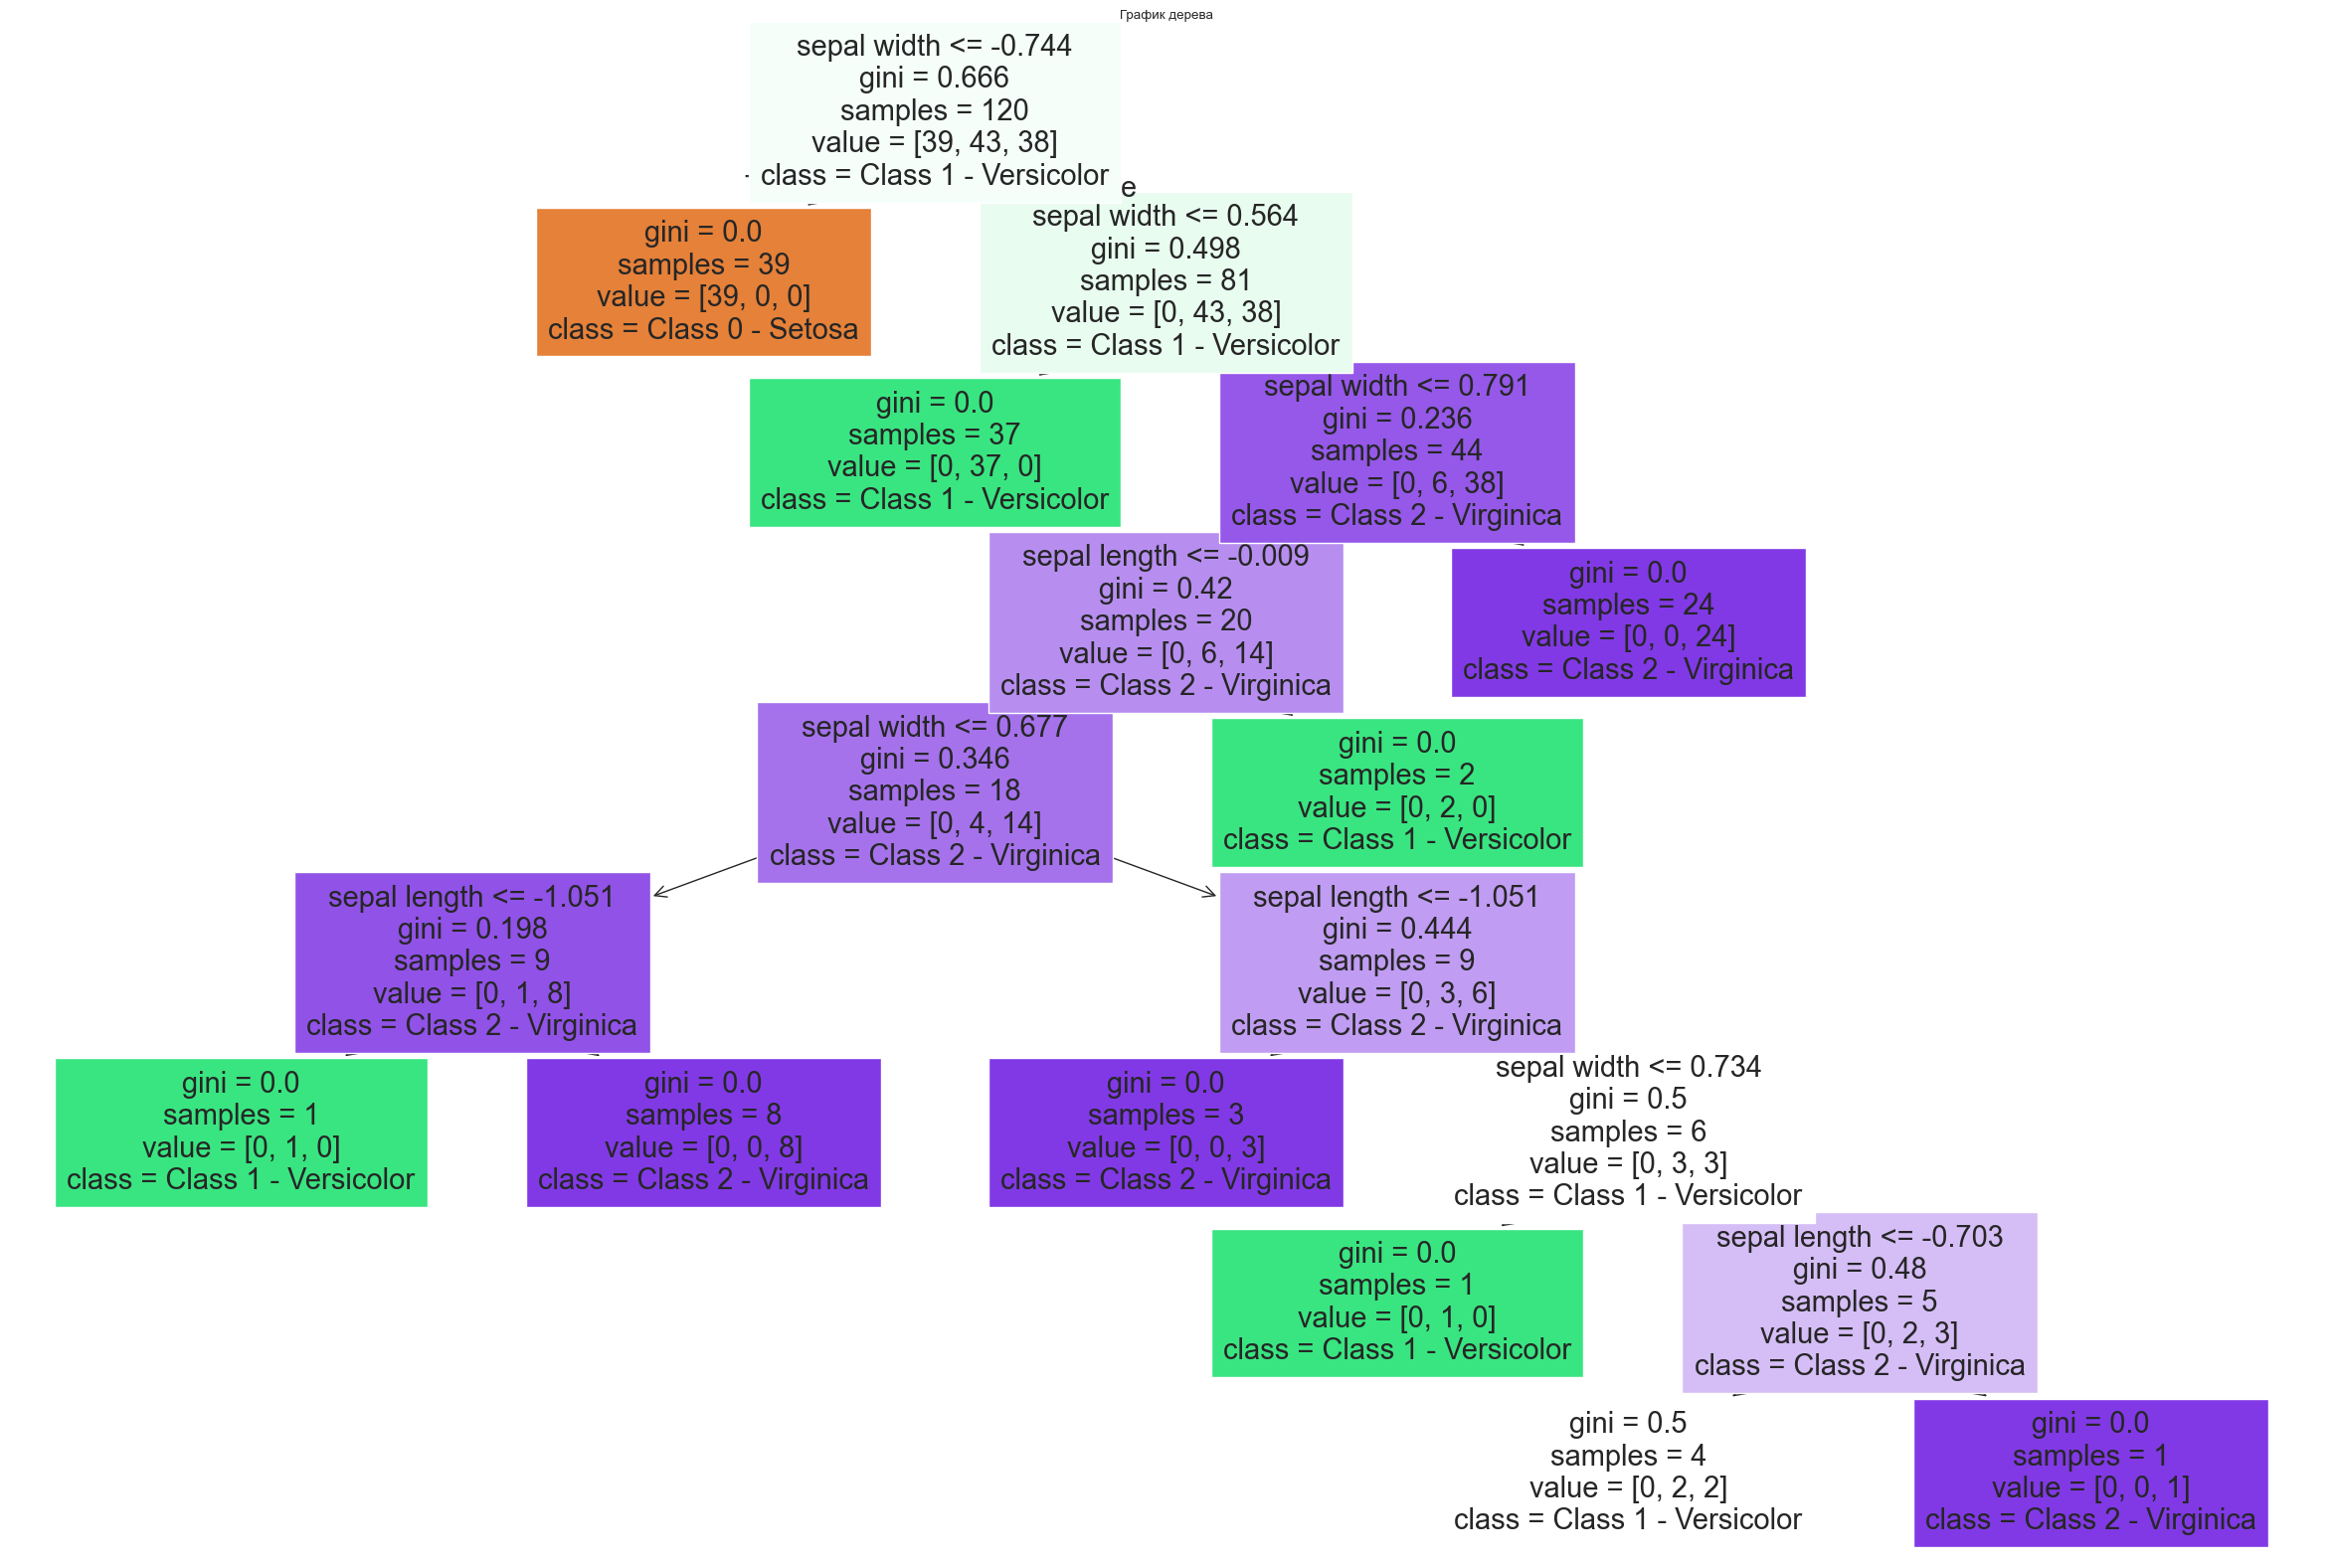

In [23]:
# Обучение модели случайного леса
rf_model_test = RandomForest(n_trees=100)
rf_model_test.fit(X_train_iris, y_train_iris)

# Предсказание на тестовом наборе
y_pred_iris_test = rf_model_test.predict(X_test_iris)

# Вычисление и вывод точности модели, генерация отчета о классификации, полноты и F1-меры
accuracy_test = accuracy_score(y_test_iris, y_pred_iris_test)
precision_test = precision_score(y_test_iris, y_pred_iris_test, average='weighted')
recall_test = recall_score(y_test_iris, y_pred_iris_test, average='weighted')
f1_test = f1_score(y_test_iris, y_pred_iris_test, average='weighted')
report_test = classification_report(y_test_iris, y_pred_iris_test)

# Вывод результатов
print(f"Точность модели случайного леса: {accuracy_test:.2f}")
print(f"Полнота модели случайного леса: {recall_test:.2f}")
print(f"Оценка качества классификации случайного леса: {precision_test:.2f}")
print(f"F1-мера модели случайного леса: {f1_test:.2f}")
print("\nОтчет о классификации:\n", report_test)

# Построение графика дерева
plt.figure(figsize=(30, 20))  

plot_tree(rf_model_test.trees[0][0], filled=True, 
    feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],  # Имена признаков
    class_names=['Class 0 - Setosa', 'Class 1 - Versicolor', 'Class 2 - Virginica'])  # Имена классов для Iris
plt.title('График дерева')  
plt.show()  

##### 7. Проведите сравнение результатов вашей модели со стандартной реализацией случайного леса из библиотеки scikit-learn.

Результаты модели случайного леса (моя кривописная):
Точность модели случайного леса: 1.00
Полнота модели случайного леса: 1.00
Оценка качества классификации случайного леса: 1.00
F1-мера модели случайного леса: 1.00

Отчет о классификации:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Результаты стандартной модели случайного леса (библиотека scikit-learn):
Точность модели случайного леса scikit-learn: 1.00
Полнота модели случайного леса scikit-learn: 1.00
Оценка качества классификации случайного леса scikit-learn: 1.00
F1-мера модели случайного леса scikit-learn: 1.00

Отчет о классификации scikit-learn:
               precision    recall  f1-score   sup

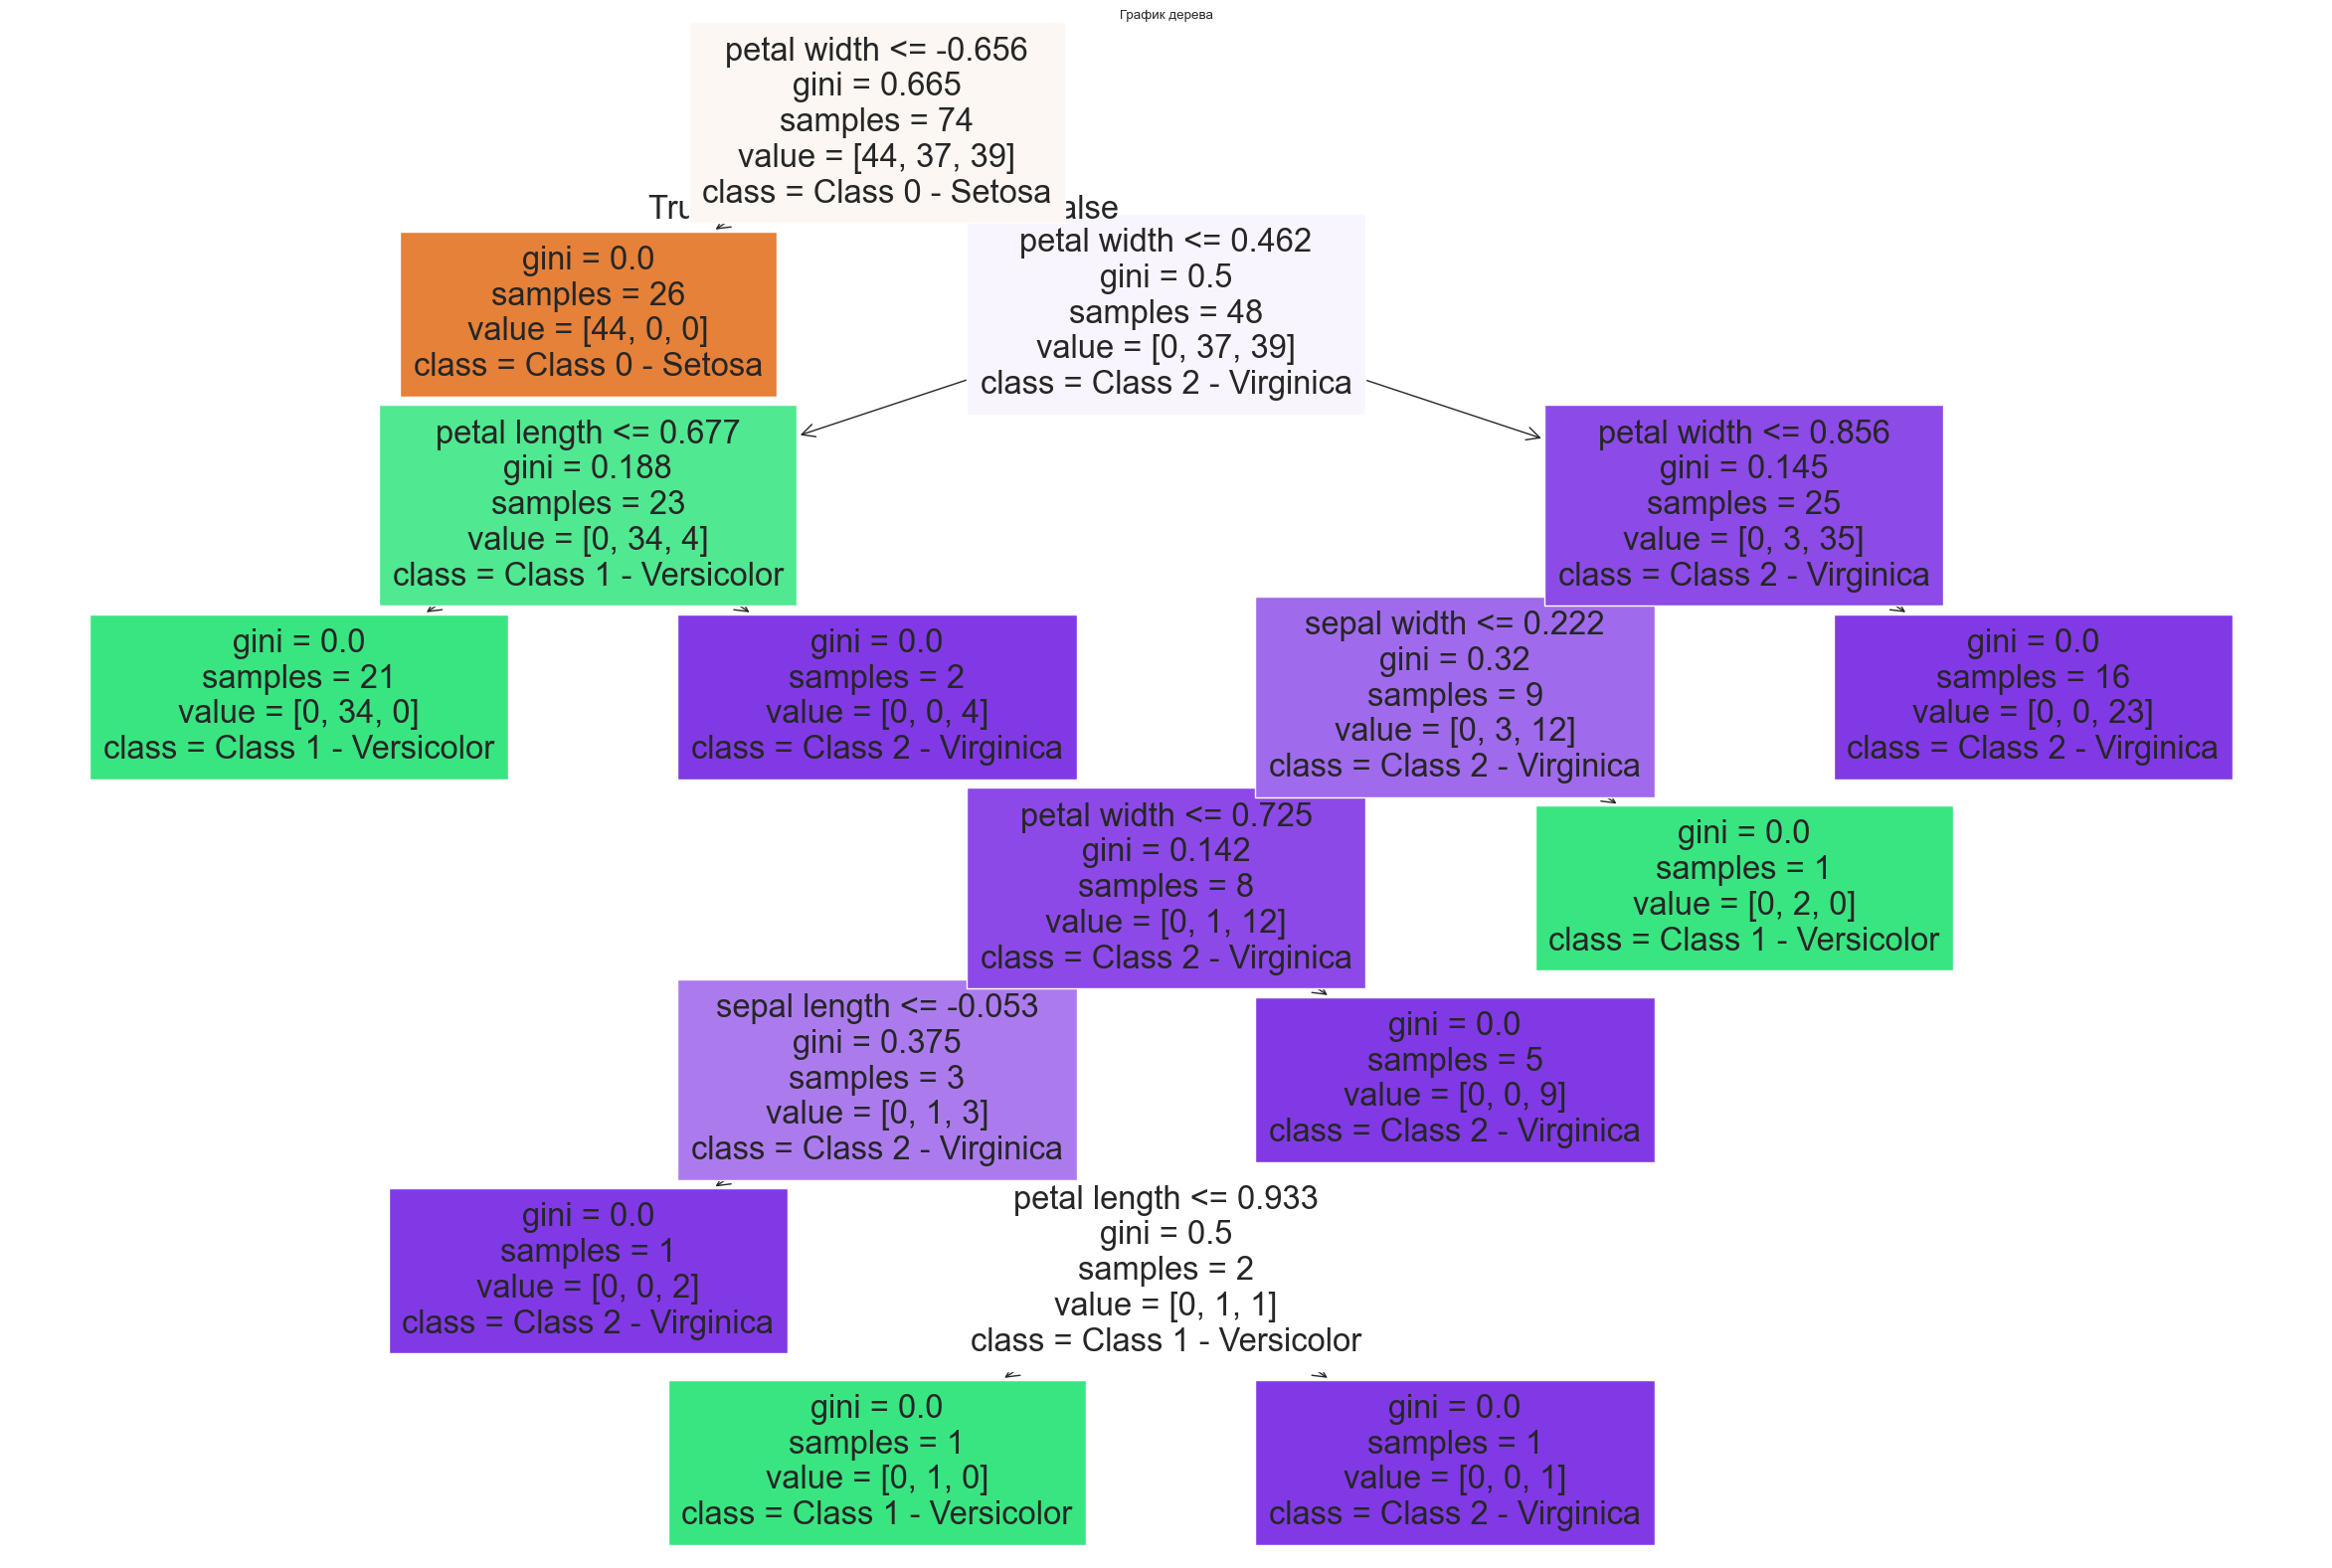

In [24]:
# Обучение стандартной модели случайного леса из scikit-learn
sklearn_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
sklearn_rf_model.fit(X_train_iris, y_train_iris)

# Предсказание на тестовом наборе
y_pred_sklearn = sklearn_rf_model.predict(X_test_iris)

# Оценка производительности стандартной модели
accuracy_sklearn = accuracy_score(y_test_iris, y_pred_sklearn)
precision_sklearn = precision_score(y_test_iris, y_pred_sklearn, average='weighted')
recall_sklearn = recall_score(y_test_iris, y_pred_sklearn, average='weighted')
f1_sklearn = f1_score(y_test_iris, y_pred_sklearn, average='weighted')
report_scaled = classification_report(y_test_iris, y_pred_sklearn)

# Вывод результатов
print("Результаты модели случайного леса (моя кривописная):")
print(f"Точность модели случайного леса: {accuracy_test:.2f}")
print(f"Полнота модели случайного леса: {recall_test:.2f}")
print(f"Оценка качества классификации случайного леса: {precision_test:.2f}")
print(f"F1-мера модели случайного леса: {f1_test:.2f}")
print("\nОтчет о классификации:\n", report_test)

print("\nРезультаты стандартной модели случайного леса (библиотека scikit-learn):")
print(f"Точность модели случайного леса scikit-learn: {accuracy_sklearn:.2f}")
print(f"Полнота модели случайного леса scikit-learn: {recall_sklearn:.2f}")
print(f"Оценка качества классификации случайного леса scikit-learn: {precision_sklearn:.2f}")
print(f"F1-мера модели случайного леса scikit-learn: {f1_sklearn:.2f}")
print("\nОтчет о классификации scikit-learn:\n", report_scaled)

# Построение графика дерева (первого дерева из леса)
plt.figure(figsize=(30, 20))
plot_tree(sklearn_rf_model.estimators_[0], filled=True, 
    feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],  # Имена признаков
    class_names=['Class 0 - Setosa', 'Class 1 - Versicolor', 'Class 2 - Virginica'])  # Имена классов для Iris
plt.title('График дерева')  
plt.show()  